In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
#
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
#
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv(r"C:\Users\User\Downloads\avocado.csv")

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [7]:
#regions counts
data.region.value_counts(dropna=False)

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [8]:
data.shape

(18249, 14)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [10]:
data.groupby('type').size()

type
conventional    9126
organic         9123
dtype: int64

In [11]:
data.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [12]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

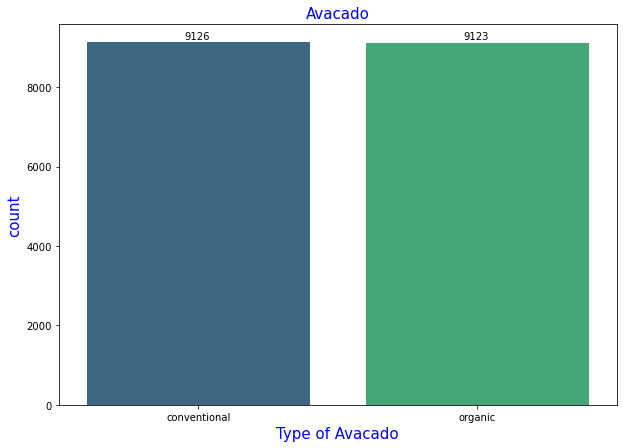

In [13]:
f,ax = plt.subplots(figsize=(10,7))
ax = sns.countplot(x=data.type,label='Count',palette='viridis')
plt.xlabel('Type of Avacado',fontsize=15,color='blue')
plt.ylabel('count',fontsize=15,color='blue')
plt.title('Avacado',fontsize=15,color='blue')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+75))

Text(0, 0.5, 'Average Price')

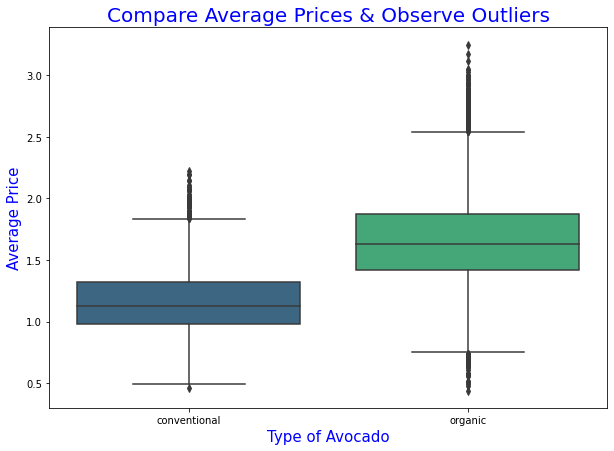

In [14]:
f,ax= plt.subplots(figsize=(10,7))
sns.boxplot(x='type',y='AveragePrice',data=data,palette='viridis')
plt.title("Compare Average Prices & Observe Outliers",fontsize = 20,color='blue')
plt.xlabel('Type of Avocado',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

Text(0, 0.5, 'Average Price')

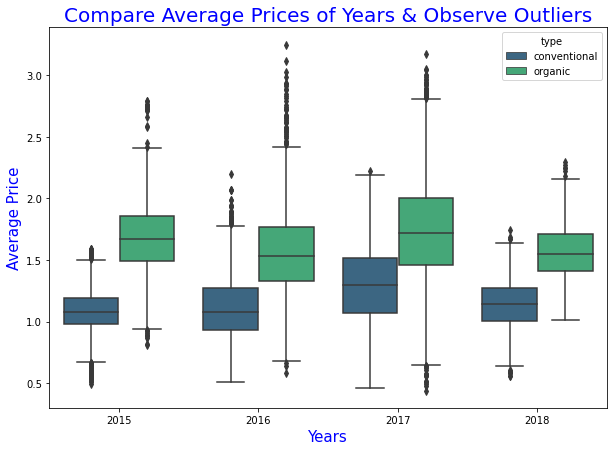

In [15]:
f,ax = plt.subplots(figsize = (10,7))
sns.boxplot(x="year", y="AveragePrice",hue="type",data=data,palette="viridis");
plt.title("Compare Average Prices of Years & Observe Outliers",fontsize = 20,color='blue')
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

Text(0, 0.5, 'Average Price')

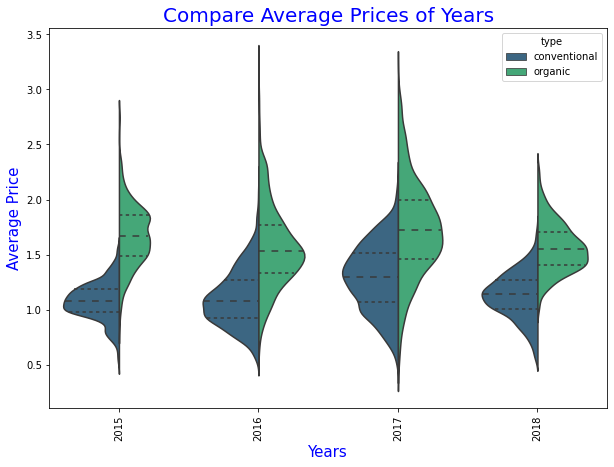

In [16]:
f,ax = plt.subplots(figsize = (10,7))
sns.violinplot(x="year", y="AveragePrice", hue="type", data=data,split=True, inner="quart",palette="viridis")
plt.xticks(rotation=90)
plt.title("Compare Average Prices of Years",fontsize = 20,color='blue')
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

Text(56.625, 0.5, 'Average Price')

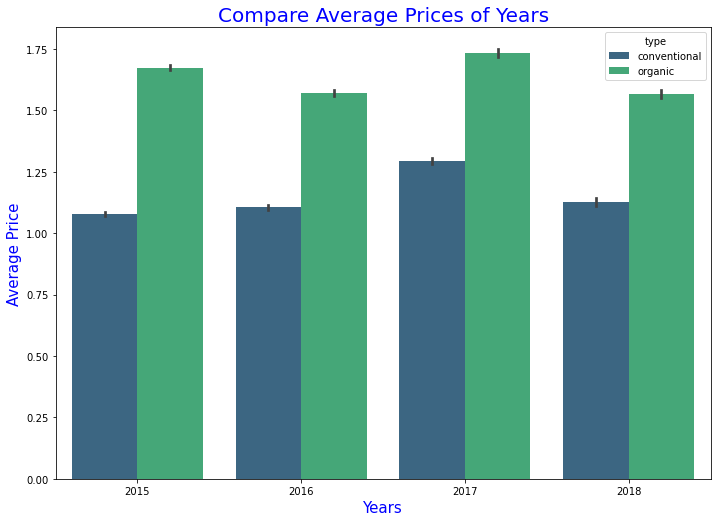

In [17]:
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(x="year", y="AveragePrice",hue="type",data=data,palette="viridis")
plt.tight_layout() # grafikler daha düzgün gözükecek
plt.title("Compare Average Prices of Years",fontsize = 20,color='blue')
plt.xlabel('Years',fontsize = 15,color='blue')
plt.ylabel('Average Price',fontsize = 15,color='blue')

<AxesSubplot:>

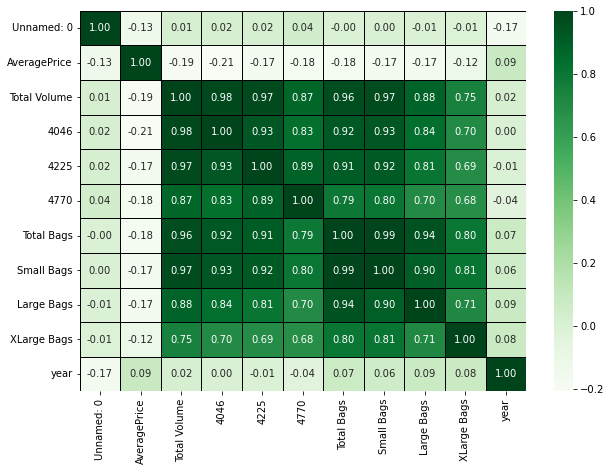

In [18]:
f,ax = plt.subplots(figsize = (10,7))
#data.drop("Unnamed: 0",axis=1,inplace=True)
sns.heatmap(data.corr(), annot=True,cmap = 'Greens', linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax)

In [19]:
# Split Dataset, "conventional & organic"
data_con = data[data["type"] == "conventional"]
data_org = data[data["type"] == "organic"]

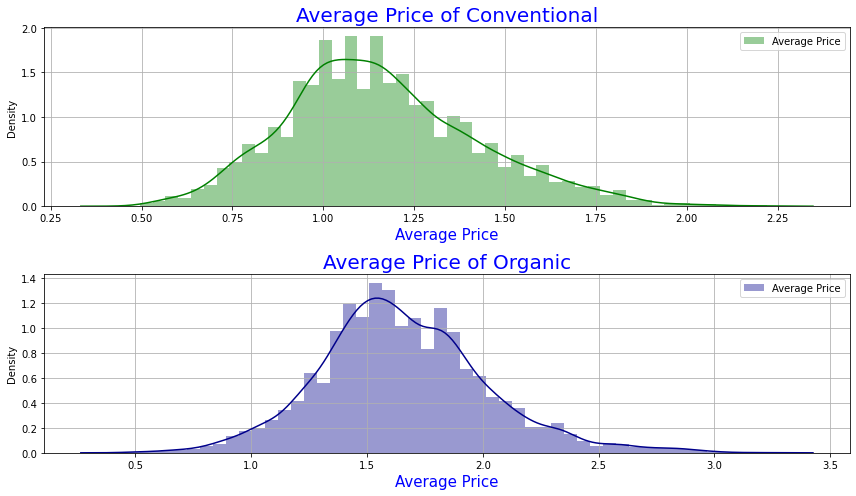

In [20]:
f,ax = plt.subplots(figsize = (12,7))
plt.subplot(2,1,1) # 
sns.distplot(data_con.AveragePrice,color="green",label="Average Price");
plt.title("Average Price of Conventional",fontsize = 20,color='blue')
plt.xlabel('Average Price',fontsize = 15,color='blue')
plt.legend()
plt.grid()
#
plt.subplot(2,1,2)
sns.distplot(data_org.AveragePrice,color="darkblue",label="Average Price");
plt.title("Average Price of Organic",fontsize = 20,color='blue')
plt.xlabel('Average Price',fontsize = 15,color='blue')
plt.tight_layout() # 
plt.legend()
plt.grid()

### Price of Regions

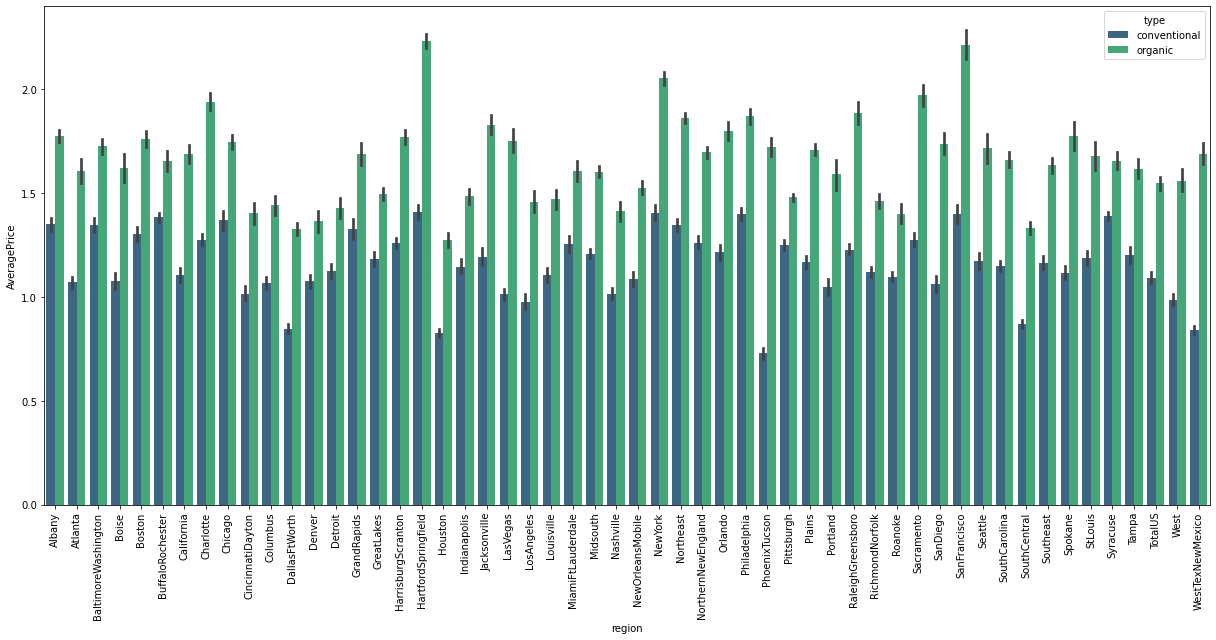

In [21]:
# Avocado Average Price
f,ax = plt.subplots(figsize = (17,9))
sns.barplot(x="region", y="AveragePrice",hue="type",data=data,palette="viridis")
plt.xticks(rotation=90)
plt.tight_layout()

(-0.5, 511.5, 383.5, -0.5)

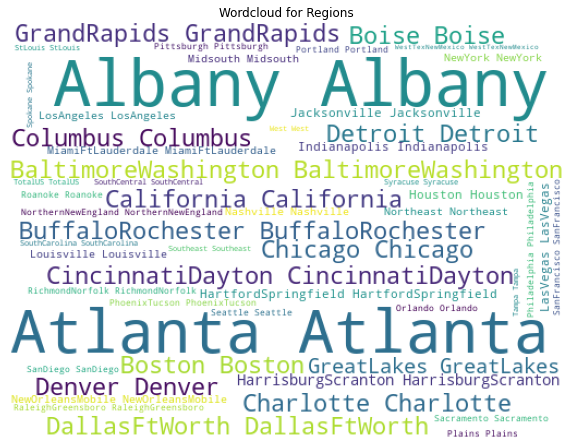

In [22]:
from wordcloud import WordCloud 
data_region = data.region
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate("*".join(data_region))
plt.imshow(wordcloud)
plt.title("Wordcloud for Regions")
plt.axis('off')

In [23]:
!pip3 install wordcloud

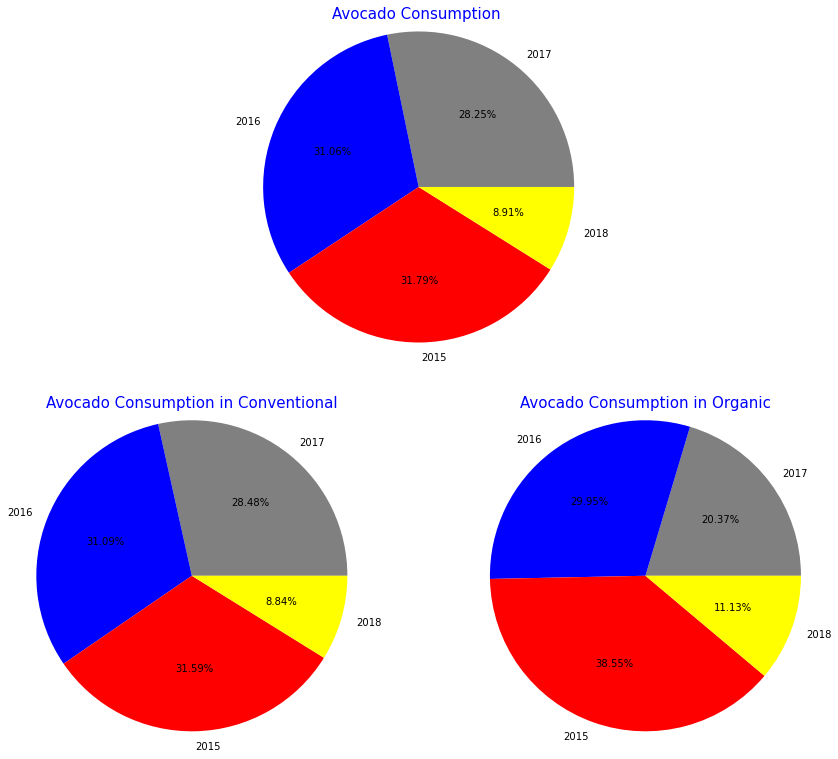

<Figure size 432x288 with 0 Axes>

In [24]:
# Sum(ounce) of Avocados for per year
data_2015 = data[data.year==2015]
sum_2015 = data_2015["Total Volume"].sum()
data_2016 = data[data.year==2016]
sum_2016 = data_2016["Total Volume"].sum()
data_2017 = data[data.year==2017]
sum_2017 = data_2017["Total Volume"].sum()
data_2018 = data[data.year==2018]
sum_2018 = data_2018["Total Volume"].sum()
#**********************************************************************************
# Sum(ounce) of Avocados for per year in conventional
data_con_2015 = data_con[data.year==2015]
sum_con_2015 = data_con_2015["Total Volume"].sum()
data_con_2016 = data_con[data.year==2016]
sum_con_2016 = data_con_2016["Total Volume"].sum()
data_con_2017 = data_con[data.year==2017]
sum_con_2017 = data_con_2017["Total Volume"].sum()
data_con_2018 = data_con[data.year==2018]
sum_con_2018 = data_con_2018["Total Volume"].sum()
#**********************************************************************************
# Sum(ounce) of Avocados for per year in organic
data_org_2015 = data_org[data.year==2015]
sum_org_2015 = data_org_2015["Total Volume"].sum()
data_org_2016 = data_org[data.year==2016]
sum_org_2016 = data_org_2016["Total Volume"].sum()
data_org_2017 = data_org[data.year==2017]
sum_org_2017 = data_org_2017["Total Volume"].sum()
data_org_2018 = data_org[data.year==2018]
sum_org_2018 = data_org_2018["Total Volume"].sum()

labels = data.year.value_counts().index
colors = ['grey','blue','red','yellow']
fracs = [15, 30, 45, 10]
sizes_1 = [sum_con_2015,sum_con_2016,sum_con_2017,sum_con_2018]#for con
fig = plt.figure(figsize = (9,9))
#
sizes_2 = [sum_org_2015,sum_org_2016,sum_org_2017,sum_org_2018]#for org
ax1 = fig.add_axes([0, -0.1, .5, .5], aspect=1)
ax1.pie(sizes_1, labels=labels, radius = 1.2,colors=colors,autopct='%1.2f%%')
#
ax2 = fig.add_axes([0.7, -0.1, .5, .5], aspect=1)
ax2.pie(sizes_2, labels=labels, radius = 1.2,colors=colors,autopct='%1.2f%%')
#
sizes_0 = [sum_2015,sum_2016,sum_2017,sum_2018]
ax3 = fig.add_axes([.35, 0, .5, 1.5], aspect=1)
ax3.pie(sizes_0, labels=labels, radius = 1.2,colors=colors,autopct='%1.2f%%')
#
ax1.set_title('Avocado Consumption in Conventional',color = 'blue',fontsize = 15)
ax2.set_title('Avocado Consumption in Organic',color = 'blue',fontsize = 15)
ax3.set_title('Avocado Consumption ',color = 'blue',fontsize = 15)
plt.show()
plt.tight_layout() # 

In [25]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [26]:
# split date: day,month,year 
liste = []
for date in data.Date:
    liste.append(date.split("-"))
    
# month and day adding to lists
month = []
day = []
for i in range(len(liste)):
    month.append(liste[i][1])
    day.append(liste[i][2])
    
# adding to dataset
data["month"] = month
data["day"] = day

# delete old date column
data.drop(["Date"],axis=1,inplace=True)

#convert objects to int
data.month = data.month.values.astype(int)
data.day = data.day.values.astype(int)

In [27]:
# drop unnecessary features
data.drop(["Unnamed: 0","region"],axis=1,inplace=True)

In [28]:
# find dummy variables
data["type"] = pd.get_dummies(data.type,drop_first=True)

In [29]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29


In [30]:
# Y
y = data[["type"]][:]

In [31]:
# X
x = data.drop(["type"],axis=1,inplace=True)
x = data.iloc[:,:]

In [32]:
# Scale the data to be between -1 and 1
sc = StandardScaler()
x = sc.fit_transform(x)

In [33]:
# Creating Train and Test Datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [34]:
# Model List
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))

In [39]:
# evaluate models using cross validation score:
results = [] 
names = []
for name, model in models:
    kfold = KFold(n_splits=10) 
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    print("Model Name:{} Model Acc:{:.3f} Model Std:{:.3f}".format(name, cv_results.mean(), cv_results.std()))

Model Name:LR Model Acc:0.917 Model Std:0.005
Model Name:KNN Model Acc:0.884 Model Std:0.010
Model Name:SVM Model Acc:0.920 Model Std:0.003
Model Name:NB Model Acc:0.866 Model Std:0.010
Model Name:DTC Model Acc:0.985 Model Std:0.002


### Tuning Decision Tree Classifier

In [44]:
# Tuning Decision Tree Model
criterions = ["gini","entropy"]
param_grid = dict(criterion=criterions) 

In [45]:
dtc = DecisionTreeClassifier()
gs = GridSearchCV(estimator=dtc,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)
Best Score: 0.9842143156333932
Best Parameters: {'criterion': 'entropy'}

SyntaxError: invalid syntax (3036091880.py, line 8)

In [46]:
# Time to use DFC for dataset:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [47]:
#confussion matrix: 
from sklearn import metrics
dtc_cm = confusion_matrix(y_test,y_pred)
dtc_cross = pd.crosstab(y_test["type"], y_pred,rownames=['Actual Values'], colnames=['Predicted Values'])
dtc_acc = metrics.accuracy_score(y_test, y_pred)
print(dtc_cross)
print(dtc_acc)

Predicted Values     0     1
Actual Values               
0                 2939    50
1                   30  3004
0.9867175826000332


In [48]:
# Feature Importance
#print(rfc.feature_importances_)
# You can see that we are given an importance score 
# for each attribute where the larger the score, 
# the more important the attribute.
feature = pd.DataFrame(data=[dtc.feature_importances_], columns=data.columns)
feature.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
0,0.076993,0.645749,0.028086,0.026658,0.066661,0.006588,0.00923,0.023334,0.098143,0.007162,0.010412,0.000985


In [49]:
# Classiﬁcation Report
from sklearn.metrics import classification_report 
report = classification_report(y_test, y_pred) 
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2989
           1       0.98      0.99      0.99      3034

    accuracy                           0.99      6023
   macro avg       0.99      0.99      0.99      6023
weighted avg       0.99      0.99      0.99      6023



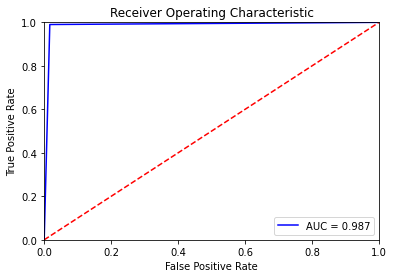

In [50]:
# ROC Eğrisi:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dtc.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [51]:
# ensembles 
ensembles = [] 
ensembles.append(('ABC', AdaBoostClassifier()))
ensembles.append(('GBC', GradientBoostingClassifier()))
ensembles.append(('RFC', RandomForestClassifier()))
ensembles.append(('ETC', ExtraTreesClassifier()))

### Tuning for Extra Trees Classifier

In [57]:
# Tuning Extra Trees Class. Model
estimators = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29] 
criterions = ["gini","entropy"]
param_grid = dict(n_estimators=estimators,criterion=criterions) 

In [ ]:
etc = ExtraTreesClassifier()
gs = GridSearchCV(estimator=etc,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(x_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

In [ ]:
# Time to use ETC for dataset:
etc = ExtraTreesClassifier(n_estimators=27,criterion="gini")
etc.fit(x_train,y_train)
y_pred = etc.predict(x_test)

In [ ]:
#confussion matrix: 
from sklearn import metrics
etc_cm = confusion_matrix(y_test,y_pred)
etc_cross = pd.crosstab(y_test["type"], y_pred,rownames=['Actual Values'], colnames=['Predicted Values'])
etc_acc = metrics.accuracy_score(y_test, y_pred)
print(etc_cross)
print(etc_acc)